<a href="https://colab.research.google.com/github/RJuro/AS2021/blob/main/SVAR_%C3%98velse_2_Gapminder_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/RJuro/AS2021/blob/main/%C3%98velse_2_Gapminder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Øvelse 2 - Gapminder

## Varians, Standardafvigelse og Visualisering

I denne øvelse kommer vi til at bygge videre på de funktioner og færdigheder i lærte i Øvelse 1. 
Øvelsen kommer primært til at omhandle varians, standardafvigelse og hvordan vi kan sammenligne variabler. 

Varians er et mål for hvor meget en variable variere eller svinger. Varians beregnes ved at summere hvor meget hver enkelt datapunkt afviger fra gennemsnittet og tage gennemsnittet. Det vil sige at for at udregne variansen kigger man på hvert eneste datapunkt og trækker gennemsnittet fra, summere differencerne og dividerer med antallet af observationer (n):
$$\sigma^2 = \frac{1}{n} * ((x_1 - \bar{x})^2 + (x_2 - \bar{x})^2 + ... + (x_n - \bar{x})^2) = \frac{1}{n} \sum_{i=1}^{n}(x_i - \bar{x})^2 $$
Hvis det er første gang man støder ind i græske bogstaver, kan ovenstående godt virke lidt uoverskueligt. Varians er typisk betegnet med det græske bogstav sigma i anden potens ($\sigma^2$). Det første græske bogstav i ovenstående er derfor betegnelsen for variansen. n er antallet af observationer i vores data.
Når vi skriver en lige streg (bar) over en variabel er det for, at angive at det er gennemsnittet af variablen vi refererer til. $\bar{x}$ er betegner derfor gennemsnittet af x.
Det sidste græske bogstav vi ser er et stort sigma ($\sigma$) som er brugt som summations tegn. Her menes der at vi vil beregne $(x_i - \bar{x})^2$ for alle x mellen i=1 og n, hvor i er nummer et i rækken af x'er vi starter med og n er det totale antal af x'er. Når vi beregner variansen sætter vi differencen mellem det individuelle datapunkt x og gennemsnittet $\bar{x}$ i anden, for at sørge for, at det er et positivt tal. 

For at beregne standardafvigelsen tager vi kvadratroden af variansen. Standardafvigelsen er betegnet som $\sigma$. Forskellen på standardafvigelsen og variansen er at, variansen ikke er i samme størrelsesorden som vores data, fordi differencen er sat i anden. Variansen kan derfor godt være svær at drage konklusioner ud fra i forhold til vores data. Standardafvigelsen forsøger at gøre variansen sammenlignelig med dataen ved at tage kvadratroden af differencerne, og derfor tilbagebringe den til dataens størrelsesorden.

In [ ]:
# Vi importerer igen de nødvendige libraries.
import pandas as pd # pandas til at arbejde med data i DataFrames.
import numpy as np # numpy til at lave beregninger.
import seaborn as sns # seaborn til at lave med visualiseringer.
import matplotlib.pyplot as plt # pyplot til at lave visualiseringer

sns.set() # Vi bruger seaborns plotstyle.
pd.set_option('display.precision', 2) # Vi sætter pandas til kun at vise 2 decimaler. 

## Gapminder data

Gapminder er en svensk organisation som forsøger, at oplyse omkring verdens tilstand gennem statistik og fremragende visualiseringer. Det er startet af Ola Rosling, Anna Rosling Rönnlund, and Hans Rosling. 

Hvis i vil have inspiration og en fornemmelse af hvordan simpelt data også kan visualiseres, så kig på de forskellige 'tools' de har hos Gapminder: https://www.gapminder.org/tools/#


In [ ]:
# Vi importerer vores data.
df = pd.read_csv('https://raw.githubusercontent.com/STLinde/Anvendt-Statistik/main/gapminder_full.csv')

## 1: Overblik, Indledende Data Analyse

**NB: Skriv besvarelser og forklaringer på spørgsmålene i tekstboksene under hvert spørgsmål, efter i har skrevet den påkrævede kode og kørt den.**

Når man begynder at arbejde med ny data, så er det altid en god idé at skabe sig et overblik over dataen, for at vide hvad man arbejder med. I Øvelse 1 så vi hvordan man kan bruge `head()` og `info()` til at skabe sig et overblik.

In [ ]:
# 1.1: Hvordan ser de første 5 rækker af dataen ud?
# 1.2: Hvilke kolonner indeholder dataen?
df.head()

,country,year,population,continent,life_exp,gdp_cap
0,Afghanistan,1952,8425333,Asia,28.80,779.45
1,Afghanistan,1957,9240934,Asia,30.33,820.85
2,Afghanistan,1962,10267083,Asia,32.00,853.10
3,Afghanistan,1967,11537966,Asia,34.02,836.20
4,Afghanistan,1972,13079460,Asia,36.09,739.98


*1.1 Svar:*

*1.2 Svar:*

In [ ]:
# 1.3: Er der manglende data i nogle af kolonnerne?
# 1.4: Hvilke datatyper er der i vores dataset?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     1704 non-null   object 
 1   year        1704 non-null   int64  
 2   population  1704 non-null   int64  
 3   continent   1704 non-null   object 
 4   life_exp    1704 non-null   float64
 5   gdp_cap     1704 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB


*1.3 Svar:*

*1.4 Svar:*

In [ ]:
# 1.5: I hvilket år starter vores data?
df['year'].min()

1952

In [ ]:
# 1.6: I hvilket år slutter vores data? 
df['year'].max()

2007

Det er nogle gange godt at vide hvor mange unikke kategorier kategorier der er i en kolonne i ens data. For at finde ud af det kan vi bruge pandas' indbyggede funktioner `.unique()` og `.nunique()`. Den første funktion `.unique()` returnerer en liste af unikke værdier i en kolonne og den anden funktion `.nunique()` returnerer antallet af unikke værdier i en kolonne. 

In [ ]:
# 1.7: Hvor mange lande er inkluderet i vores DataFrame?
df['country'].nunique()

142

Når man arbejder med data i numeriske kolonner er det også tit en god ide, at se på hvordan gennemsnittet og medianen er. 

In [ ]:
# 1.8: Hvad er den gennemsnitlige levetid (life_exp)?
df['life_exp'].mean()

59.474439366197174

In [ ]:
# 1.9: Hvad er den gennemsnitlige gdp per capita (gdp_cap)?
df['gdp_cap'].mean()

7215.327081212149

In [ ]:
# 1.10: Hvad er den gennemsnitlige levetid per kontinent?
df.life_exp.groupby(df['continent']).mean()

continent
Africa      48.87
Americas    64.66
Asia        60.06
Europe      71.90
Oceania     74.33
Name: life_exp, dtype: float64

In [ ]:
# 1.11 Hvad er den gennemsnitlige gdp per capita per kontinent?
df.gdp_cap.groupby(df['continent']).mean()

continent
Africa       2193.75
Americas     7136.11
Asia         7902.15
Europe      14469.48
Oceania     18621.61
Name: gdp_cap, dtype: float64

*1.12: Baseret på de ovenstående gennemsnit hvad kan du sige omkring fordelingen af gdp per capita og gennemsnitlig levetid på kontinenterne?*

*1.12 Svar:*

In [ ]:
df['year'].describe()

count    1704.00
mean     1979.50
std        17.27
min      1952.00
25%      1965.75
50%      1979.50
75%      1993.25
max      2007.00
Name: year, dtype: float64

## 2: Kvantiler, Varians og Standardafvigelse

I dette afsnit af øvelsen kommer vi til at se på kvantiler indledningsvist, og derefter bevæger vi os over i beregning af varians og standardafvigelse.

Som i den netop overståede peergrade kan i beregne kvantiler ved brug af `.quantile` funktionen, dette giver et godt overblik over hvordan dataen er fordelt.

In [ ]:
# 2.1: Beregn 25., 50., 75., og 97,5. kvantiler for gdp per capita:
quantiles = [0.25, 0.50, 0.75, 0.975]
df['gdp_cap'].quantile(quantiles)

0.25     1202.06
0.50     3531.85
0.75     9325.46
0.97    32059.77
Name: gdp_cap, dtype: float64

*2.2: Hvad siger dette om fordelingen af gdp per capita?*
Svar:

In [ ]:
# 2.3: Beregn 25., 50., 75. og 97.5, kvantiler for levetiden:
quantiles = [0.25, 0.50, 0.75, 0.975]
df['life_exp'].quantile(quantiles)

0.25    48.20
0.50    60.71
0.75    70.85
0.97    78.82
Name: life_exp, dtype: float64

*2.4: Hvad siger dette om fordelingen af levetiden?* Svar:

For at se kvantiler og anden beskrivende statistik om en kollonne i en DataFrame kan man også bruge funktionen `.describe()`.

In [ ]:
# 2.5: Beregn kvantiler og anden beskrivende statistik for gdp per capita:
df['gdp_cap'].describe()

count      1704.00
mean       7215.33
std        9857.45
min         241.17
25%        1202.06
50%        3531.85
75%        9325.46
max      113523.13
Name: gdp_cap, dtype: float64

In [ ]:
# 2.6: Beregn kvantiler og anden beskrivende statistik for levetiden: 
df['life_exp'].describe()

count    1704.00
mean       59.47
std        12.92
min        23.60
25%        48.20
50%        60.71
75%        70.85
max        82.60
Name: life_exp, dtype: float64

Nu bevæger vi os over i beregning af varians og standardafvigelse. Først vil vi 'manuelt' beregne variansen og standardafvigelsen og derefter bruger vi numpy til at løse samme opgave.

Variansen er som tidligere beskrevet ved at trække hver individuel observation fra gennemsnittet og sætte differencen i anden, summere det og dividere med antallet af observationer for, at få den gennemsnitlige difference.

Vi beregner først differencerne i en variabel `diff`, sætter dem i anden i en variabel `diff_sq`, summerer og dividerer med antallet af observationer i variablen `varians`. NB: Når noget skal sættes i anden potens i python bruges `**2`

In [ ]:
# 2.7: Udfyld manglende kode så vi beregner variansen for levetiden: 
diff = df['life_exp'] - df['life_exp'].mean()
diff_sq = diff ** 2 
varians = sum(diff_sq) / len(df)
varians

166.75374633370018

Ovenfor har vi brugt to nye funktioner `sum()` og `len()`. `sum()` bruges til at beregne summen af en kolonne, liste, array og lignende. `len()` bruges til at beregne hvor mange observationer eller items der er i en kolonne, list, array og lignende. 

Vi kan også bruge numpy til at finde variansen. Her bruger vi funktionen `np.var()`, den giver samme resultat som den udregning vi lige har lavet.

In [ ]:
# 2.8: Beregn variansen vha. numpy for levetiden: 
np.var(df['life_exp'])

166.75374633370006

In [ ]:
# 2.9: Beregn variansen vha. numpy for gdp per capita: 
np.var(df['gdp_cap'])

97112385.75659367

Variansen er et kvantitativt mål for hvor stor spredning der er i vores data. Den kan dog være svær, at udlede noget af som den er her. Vi vil derfor udregne standardafvigelsen for levetiden pba. vores variabel `varians`. Husk at for at finde standardafvigelsen skal man tage kvadratroden af variansen. Dette kan gøres vha. numpy funktionen `np.sqrt()`

In [ ]:
# 2.10: Udregn standardafvigelsen af levetiden vha. vores variabel 'varians' og numpy funktionen np.sqrt()
np.sqrt(varians)

12.913316627950396

Igen kan vi også udregne standardafvigelsen direkte fra numpy, hvilket gør det noget nemmere. Her bruger vi funktionen `np.std()`.

In [ ]:
# 2.11: Udregn standardafvigelsen af levetiden vha. numpy
np.std(df['life_exp'])

12.913316627950392

In [ ]:
# 2.12: Udregn standardafvigelsen af gdp per capita vha. numpy
np.std(df['gdp_cap'])

9854.561672474007

*2.13: Hvad fortæller standardafvigelserne os om spredningen af levetiden og gdp_cap?* Svar:

## 3: Visualisering

De næste opgaver kommer til at omhandle hvordan vi kan visualisere vores data.

Ved hjælp af matplotlib.pyplot (plt) kan vi kontrollere vores visualiseringer, give dem titler osv.

For at se spredningen af dataen kan vi bruge et boxplot. Et boxplot viser os kvantiler, median og outliers. 
For at lave et boxplot kan vi bruge seaborn: `sns.boxplot(data=df, x=kolonne)`

<AxesSubplot:title={'center':'Spredning Levetid'}, xlabel='life_exp'>

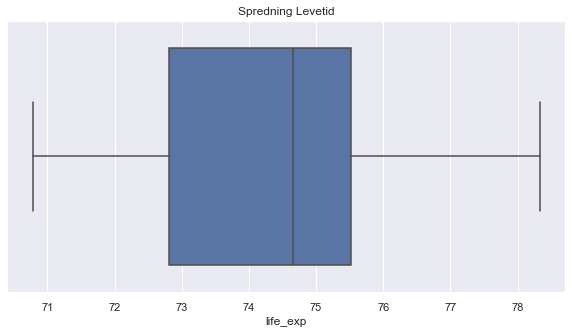

In [ ]:
# 3.1: Lav et boxplot af levetiden i Danmark:
# Brug df[df['country'] == 'Denmark'] som data.
plt.figure(figsize=(10,5)) # Vi definerer her størrelsen på vores plot.
plt.title('Spredning Levetid') # Vi definerer her titlen på vores plot.

sns.boxplot(data=df[df['country'] == 'Denmark'], x='life_exp')


<AxesSubplot:title={'center':'Spredning GDP per Capita'}, xlabel='gdp_cap'>

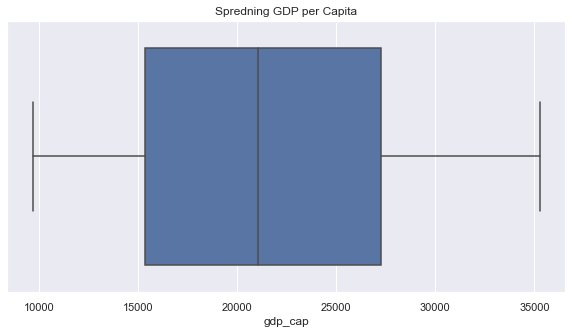

In [ ]:
# 3.2: Lav et boxplot af gdp_cap i Danmark:
plt.figure(figsize=(10,5)) # Vi definerer her størrelsen på vores plot.
plt.title('Spredning GDP per Capita') # Vi definerer her titlen på vores plot.

sns.boxplot(data=df[df['country'] == 'Denmark'], x='gdp_cap')

*3.3: Hvad fortæller de to boxplots om udviklingen af spredningen i levetid?* Svar:

Scatterplots kan bruges til at se forholdet mellem to variable. For hver observation dannes der en prik som angiver hvordan værdien for hhv. x-aksen og y-aksen. Vi kan også kategorisere prikkerne med `hue` og `size` i seaborn. Dette giver os et mere nuanceret blik for hvordan forholdet er i forhold til de kategorier vi bruger.

<AxesSubplot:xlabel='gdp_cap', ylabel='life_exp'>

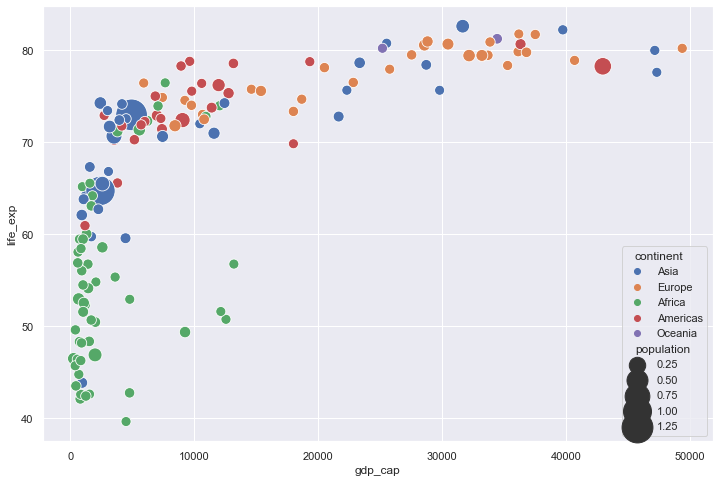

In [ ]:
# 3.4: Lav et scatterplot med x som gdp_cap, y som life_exp, hue som continent og size som population.
# Brug data fra 2007, df_2007
df_2007 = df[df['year'] == 2007] # Vi definerer DataFramen vi skal bruge, men data fra 2007.

plt.figure(figsize=(12,8)) # Vi definerer størrelsen på scatterplottet. 
sns.scatterplot(
    x=df_2007['gdp_cap'],
    y=df_2007['life_exp'],
    hue=df_2007['continent'],
    size=df_2007['population'],
    sizes=(100, 1000) # Vi definerer størrelserne på 
)

*3.5: Hvad kan man udlede af ovenstående plot omkring levetid og gdp per capita?* Svar:

I seaborn kan man bruge `FacetGrid` til at lave flere visualiseringer på en gang. På denne måde kan man angive en kategori for sine visualiseringer og dermed holde forskellige kategorier op mod hinanden. 
I `FacetGrid` angiver man hvilken DataFrame man vil bruge, hvordan den skal være delt op (kolonner).
Derefter bruger man `g.map()` til at angive hvilket plot man vil bruge, hvad x og y værdierne skal være og andre parametre der gør sig gældende for det specifikke plot.

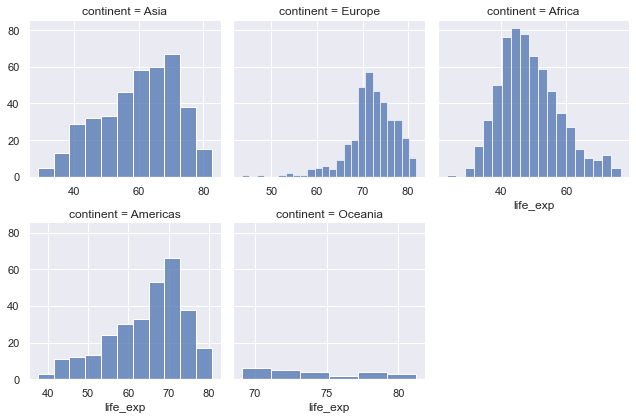

In [ ]:
# 3.6: Udfyld nedenstående facetgrid og histplot, så continent bruges som opdeler i kolonnerne, levetid bruges som x akse og
g = sns.FacetGrid(df, col='continent', col_wrap=3, sharex=False)
g.map(sns.histplot, 'life_exp')

*3.8: Hvad fortæller de ovenstående plots os omkring udviklingen af levetid over årene på de forskellige kontinenter?* Svar: